# Cab Bookings Prediction 

The business problem tackled here is trying to improve customer service for YourCabs, a cab company in Bangalore. The problem of interest is booking cancellations by the company due to unavailability of a car. The challenge is that cancellations can occur very close to the trip start time, thereby causing passengers inconvenience.<br> 

**Target variable** <br>
Car_Cancellation: *whether the booking was cancelled (1) or not (0) due to unavailability of a car.*<br>
    
**Features**<br>

id: *booking ID*<br>

user_id: *the ID of the customer (based on mobile number)*<br>

vehicle_model_id: *vehicle model type*<br>

package_id: *type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)*<br>

travel_type_id: *type of travel (1=long distance, 2= point to point, 3= hourly rental)*<br>

from_area_id: *unique identifier of area. Applicable only for point-to-point travel and packages*<br>

to_area_id: *unique identifier of area. Applicable only for point-to-point travel*<br>

from_city_id: *unique identifier of city*<br>

to_city_id: *unique identifier of city (only for intercity)*<br>

from_date: *time stamp of requested trip start*<br>

to_date: *time stamp of trip end*<br>

online_booking: *if booking was done on desktop website*<br>

mobile_site_booking: *if booking was done on mobile website*<br>

booking_created: *time stamp of booking*<br>

from_lat: *latitude of from area*<br>

from_long: *longitude of from area*<br>

to_lat: *latitude of to area*<br>

to_long: *longitude of to area*<br>

## Importing Libraries

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy import distance

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,classification_report
from sklearn.metrics import precision_recall_curve,average_precision_score
import itertools

## Importing dataset

In [4]:
df=pd.read_csv('YourCabs.csv')

## EDA

In [57]:
df

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,41602.82020,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,41604.08037,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,41602.97917,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,41602.69495,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [209]:
df.drop(columns=['id','user_id'],inplace=True)  ## both dont add anything
df.head()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [59]:
df.tail()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
43426,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,41602.82020,1,0,11/24/2013 14:25,13.03064,77.64910,12.952780,77.59088,0
43427,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,41604.08037,1,0,11/24/2013 14:30,13.19956,77.70688,13.017436,77.64458,0
43428,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,41602.97917,0,0,11/24/2013 14:35,13.07557,77.55904,NaN,NaN,0
43429,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,41602.69495,0,0,11/24/2013 14:43,12.96897,77.59456,12.938230,77.62289,0
43430,12,NaN,2,689.0,393.0,15.0,NaN,11/25/2013 5:00,41603.25385,0,1,11/24/2013 14:50,12.97672,77.64927,13.199560,77.70688,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     43431 non-null  int64  
 1   package_id           7550 non-null   float64
 2   travel_type_id       43431 non-null  int64  
 3   from_area_id         43343 non-null  float64
 4   to_area_id           34293 non-null  float64
 5   from_city_id         16345 non-null  float64
 6   to_city_id           1588 non-null   float64
 7   from_date            43431 non-null  object 
 8   to_date              25541 non-null  float64
 9   online_booking       43431 non-null  int64  
 10  mobile_site_booking  43431 non-null  int64  
 11  booking_created      43431 non-null  object 
 12  from_lat             43338 non-null  float64
 13  from_long            43338 non-null  float64
 14  to_lat               34293 non-null  float64
 15  to_long              34293 non-null 

In [61]:
df.describe()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,25541.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,41507.974840,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,305.144945,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,25569.020830,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,41480.521110,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,41517.761550,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,41558.914630,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,41678.275680,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [62]:
df.describe(include=['object'])

,from_date,booking_created
count,43431,43431
unique,20377,39349
top,10/12/2013 6:00,10/31/2013 10:30
freq,20,18


### Null values

<AxesSubplot:>

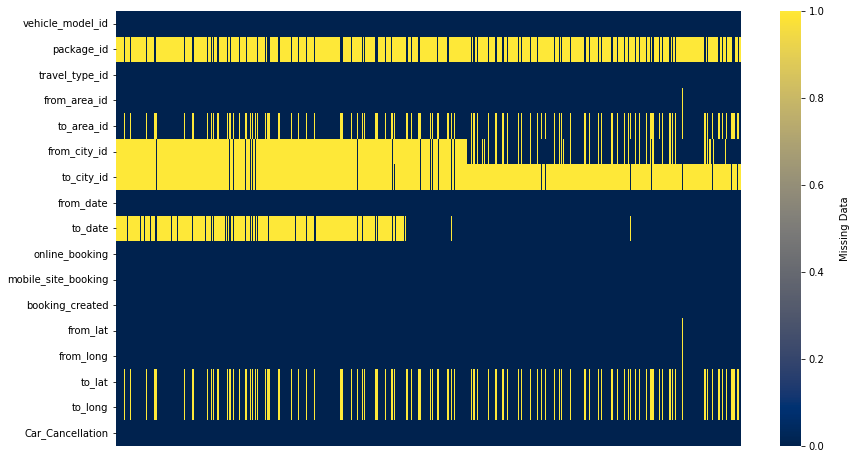

In [219]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isna().transpose(),cbar_kws={'label': '\nMissing Data'},xticklabels=False,cmap='cividis')

In [230]:
l=df.shape[0]
l  # no of rows(or observations)

43431

In [67]:
(df.isnull().sum()/l)*100

vehicle_model_id        0.000000
package_id             82.616104
travel_type_id          0.000000
from_area_id            0.202620
to_area_id             21.040271
from_city_id           62.365591
to_city_id             96.343626
from_date               0.000000
to_date                41.191775
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.214133
from_long               0.214133
to_lat                 21.040271
to_long                21.040271
Car_Cancellation        0.000000
dtype: float64

In [ ]:
## so we can see that many columns have high null values. Let us do further analysis on them and then drop the appropriate ones

### Univariate analysis

#### Target variable

<AxesSubplot:xlabel='Car_Cancellation', ylabel='count'>

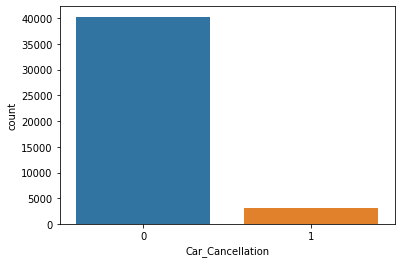

In [237]:
sns.countplot(data=df, x='Car_Cancellation')

In [236]:
(df['Car_Cancellation'].value_counts()/l)*100

0    92.788561
1     7.211439
Name: Car_Cancellation, dtype: float64

In [ ]:
## 7.2% of the bookings have been cancelled rest have gone through.

#### Features

In [ ]:
### vehicle_model_id

<AxesSubplot:xlabel='vehicle_model_id', ylabel='count'>

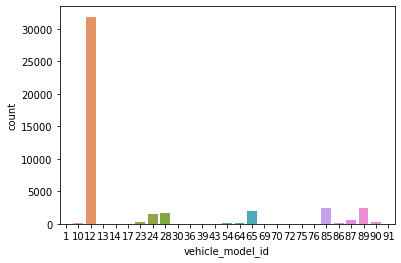

In [223]:
sns.countplot(data=df, x='vehicle_model_id')

In [69]:
(df['vehicle_model_id'].value_counts()/l)*100

12    73.355437
85     5.542124
89     5.505284
65     4.402385
28     3.918860
24     3.439939
87     1.300914
90     0.718381
23     0.683843
86     0.283208
10     0.239460
64     0.195713
54     0.168083
17     0.092100
91     0.057563
30     0.032235
36     0.020723
13     0.016118
72     0.004605
1      0.004605
43     0.004605
14     0.002303
69     0.002303
76     0.002303
75     0.002303
70     0.002303
39     0.002303
Name: vehicle_model_id, dtype: float64

In [70]:
## no variance here, 12 is repeating 73% times, thus we can drop it, as it
## will just increase the bias in the model

In [ ]:
### package_id and travel_type_id

In [71]:
## By looking at the business description we know that package_id and travel_type_id would have some relation, 
## so let us examine them together

In [72]:
df['package_id'].value_counts()

1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64

In [73]:
(df['package_id'].value_counts()/l)*100

1.0    8.065667
2.0    6.103935
6.0    1.155856
4.0    0.948631
3.0    0.863439
7.0    0.232553
5.0    0.013815
Name: package_id, dtype: float64

In [74]:
(df['travel_type_id'].value_counts()/l)*100

2    78.957427
3    17.383896
1     3.658677
Name: travel_type_id, dtype: float64

In [75]:
df[df['package_id'].isnull()]['travel_type_id'].value_counts()

## wherever package_id is null the travel_type_id is either 2 or 1 

2    34292
1     1589
Name: travel_type_id, dtype: int64

In [76]:
df[df['package_id'].isnull()==False]['travel_type_id'].value_counts()  

## so all observations with non null values in package_id has travel_type_id = 3 which denotes hourly rental, 
## which is understandable since all the packages will be some rental charge type only.

3    7550
Name: travel_type_id, dtype: int64

In [80]:
# So package_id can be dropped as it is adding nothing and is summed up in travel type id only

In [81]:
df.drop(columns=['package_id'],inplace=True)

<AxesSubplot:xlabel='travel_type_id', ylabel='count'>

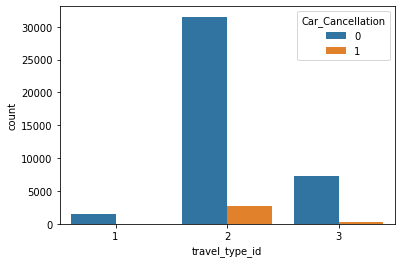

In [225]:
sns.countplot(data=df,x='travel_type_id',hue='Car_Cancellation')

In [241]:
(df[df['travel_type_id']==3]['Car_Cancellation'].value_counts()/l)*100

0    16.610255
1     0.773641
Name: Car_Cancellation, dtype: float64

In [242]:
(df[df['travel_type_id']==1]['Car_Cancellation'].value_counts()/l)*100

0    3.610324
1    0.048353
Name: Car_Cancellation, dtype: float64

In [243]:
(df[df['travel_type_id']==2]['Car_Cancellation'].value_counts()/l)*100

0    72.567981
1     6.389445
Name: Car_Cancellation, dtype: float64

In [250]:
## from here we can see that the majority of the contribution to the cancellations is coming from travel_type_id =2, the other
## two types of travel constitute only 11% of the cancellations: 
((0.77+0.048)/(0.77+0.048+6.389))*100

## Due to these low contributions, it wont add much to the model(i.e., we dont need to train the model for such less 
## contributing data points) and thus we will remove these data points.

11.350076314694048

In [83]:
df.drop(df[df.travel_type_id!=2].index,inplace=True)

df.drop(columns=['travel_type_id'],inplace=True) #obviously then we will drop this col also since all values will be '2'
df

,vehicle_model_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,28,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,12,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,12,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,12,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,12,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,12,585.0,1226.0,15.0,NaN,11/25/2013 0:00,41603.03336,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0
43426,12,1147.0,452.0,15.0,NaN,11/24/2013 18:00,41602.82020,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,12,393.0,466.0,15.0,NaN,11/26/2013 1:00,41604.08037,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43429,87,1263.0,542.0,15.0,NaN,11/24/2013 16:00,41602.69495,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [84]:
l=df.shape[0]
l

34292

In [85]:
## Again checking null values 

In [86]:
(df.isnull().sum()/l)*100

vehicle_model_id         0.000000
from_area_id             0.000000
to_area_id               0.000000
from_city_id            57.704421
to_city_id             100.000000
from_date                0.000000
to_date                 44.281465
online_booking           0.000000
mobile_site_booking      0.000000
booking_created          0.000000
from_lat                 0.000000
from_long                0.000000
to_lat                   0.000000
to_long                  0.000000
Car_Cancellation         0.000000
dtype: float64

In [87]:
## 57.7%,100% and 44% of from_city_id, to_city_id and to_date is Null, so we will remove those

In [88]:
(df['vehicle_model_id'].value_counts()/l)*100

12    74.737548
85     5.954742
89     5.733116
28     4.207979
24     3.793888
65     2.574945
90     0.848594
23     0.752362
87     0.463665
86     0.297445
10     0.244955
64     0.230374
17     0.078736
91     0.072903
1      0.005832
54     0.002916
Name: vehicle_model_id, dtype: float64

In [89]:
## vehicle id 12 has even greater percentage now, so we will drop it.

In [90]:
df['from_city_id'].value_counts()  ## only 1 unique from_city_id value, rest are all Null values

15.0    14504
Name: from_city_id, dtype: int64

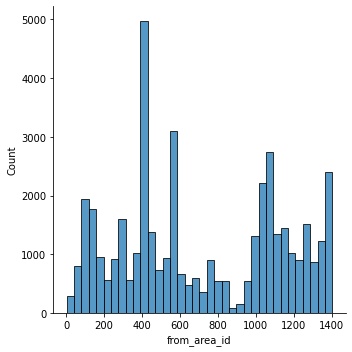

In [252]:
sns.displot(df['from_area_id'])

In [92]:
(df['from_area_id'].value_counts()/l)*100

393.0     9.841946
571.0     3.493526
585.0     2.327073
293.0     2.216260
1384.0    1.746763
            ...   
1235.0    0.002916
1209.0    0.002916
1094.0    0.002916
770.0     0.002916
1403.0    0.002916
Name: from_area_id, Length: 586, dtype: float64

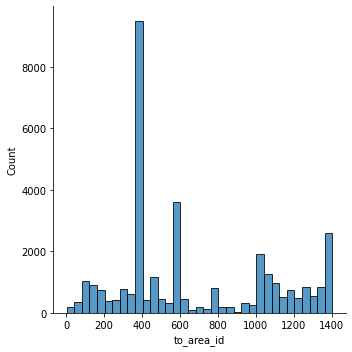

In [253]:
sns.displot(df['to_area_id'])

In [93]:
(df['to_area_id'].value_counts()/l)*100

393.0     25.594891
585.0      6.820833
1384.0     3.607255
571.0      1.936312
293.0      1.618453
            ...    
1343.0     0.002916
1356.0     0.002916
262.0      0.002916
1271.0     0.002916
1403.0     0.002916
Name: to_area_id, Length: 567, dtype: float64

In [94]:
(df['online_booking'].value_counts()/l)*100

0    63.694156
1    36.305844
Name: online_booking, dtype: float64

In [95]:
(df['mobile_site_booking'].value_counts()/l)*100

0    95.191298
1     4.808702
Name: mobile_site_booking, dtype: float64

<AxesSubplot:xlabel='online_booking', ylabel='count'>

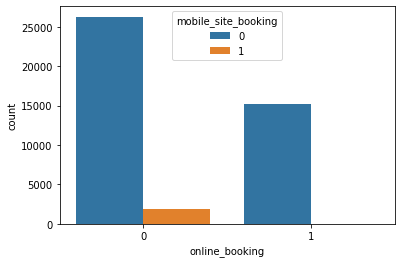

In [254]:
sns.countplot(data=df,x='online_booking',hue='mobile_site_booking')

In [96]:
## they both are dummy variables. When online booking(desktop site based) is 0 then either mobile site booking is 
## 0 or 1; when it is 0 then the booking is call based, which looks to be the majority case here.

In [97]:
df.drop(columns=['vehicle_model_id','from_city_id','to_city_id','to_date'],inplace=True)

In [98]:
df

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,768.0,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,1365.0,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...
43425,585.0,1226.0,11/25/2013 0:00,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0
43426,1147.0,452.0,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,393.0,466.0,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43429,1263.0,542.0,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [ ]:
## we are going to transform the lat, long and the date columns, so no need to analyse them yet

## Transformation and Feature Engineering

In [101]:
df

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,768.0,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,1365.0,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...
43425,585.0,1226.0,11/25/2013 0:00,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0
43426,1147.0,452.0,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,393.0,466.0,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43429,1263.0,542.0,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


#### from_area_id, to_area_id

In [102]:
df.loc[:,'BVFA'] = df['from_area_id'].map(df['from_area_id'].value_counts())   ## Booking Volume From Area (booking volume for starting destinations) 

In [103]:
df.loc[:,'CVFA'] = df['from_area_id'].map(df[["Car_Cancellation",'from_area_id']].groupby(['from_area_id'],as_index=True).sum().iloc[:,0])
## Cancellation Volume From Area

In [104]:
df.loc[:,'BVTA'] = df['to_area_id'].map(df['to_area_id'].value_counts()) ## Booking Volume To Area

In [105]:
df.loc[:,'CVTA'] = df['to_area_id'].map(df[["Car_Cancellation",'to_area_id']].groupby(['to_area_id'],as_index=True).sum().iloc[:,0])
## Cancellation Volume To Area

In [106]:
df['BVFA'].describe()

count    34292.000000
mean       545.899218
std        970.763700
min          1.000000
25%         68.000000
50%        164.000000
75%        409.000000
max       3375.000000
Name: BVFA, dtype: float64

In [107]:
df['CVFA'].describe()

count    34292.000000
mean        28.558119
std         37.277306
min          0.000000
25%          4.000000
50%         12.000000
75%         29.000000
max        115.000000
Name: CVFA, dtype: float64

In [108]:
df['BVTA'].describe()

count    34292.000000
mean      2551.704538
std       3696.842564
min          1.000000
25%         76.000000
50%        270.000000
75%       8777.000000
max       8777.000000
Name: BVTA, dtype: float64

In [109]:
df['CVTA'].describe()

count    34292.000000
mean        68.853494
std         82.186501
min          0.000000
25%          6.000000
50%         21.000000
75%        133.000000
max        296.000000
Name: CVTA, dtype: float64

In [110]:
df['BLFA']=pd.qcut(df['BVFA'],3,labels = ['Low','Medium','High'])  ## Booking Level From Area 

In [111]:
df['BLTA']=pd.qcut(df['BVTA'],3,labels = ['Low','Medium','High'])  ## Booking Level From Area 

In [112]:
df['CLFA']=pd.qcut(df['CVFA'],3,labels = ['Low','Medium','High'])  ## Cancellation Level From Area 

In [113]:
df['CLTA']=pd.qcut(df['CVTA'],3,labels = ['Low','Medium','High'])  ## Cancellation Level From Area 

In [114]:
df

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,BVFA,CVFA,BVTA,CVTA,BLFA,BLTA,CLFA,CLTA
0,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,556,59,126,5,High,Medium,High,Low
1,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,557,51,46,4,High,Low,High,Low
2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,95,7,49,1,Low,Low,Medium,Low
3,768.0,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,272,1,9,0,Medium,Low,Low,Low
4,1365.0,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,198,27,94,16,Medium,Low,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,585.0,1226.0,11/25/2013 0:00,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0,798,23,10,4,High,Low,Medium,Low
43426,1147.0,452.0,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0,110,5,330,59,Medium,Medium,Low,Medium
43427,393.0,466.0,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0,3375,115,55,5,High,Low,High,Low
43429,1263.0,542.0,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0,64,3,96,10,Low,Low,Low,Low


In [115]:
df.drop(columns=['from_area_id','to_area_id','BVFA','BVTA','CVFA','CVTA'],inplace=True)

In [116]:
df

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,BLFA,BLTA,CLFA,CLTA
0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,High,Medium,High,Low
1,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,High,Low,High,Low
2,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,Low,Low,Medium,Low
3,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,Medium,Low,Low,Low
4,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,Medium,Low,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,11/25/2013 0:00,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0,High,Low,Medium,Low
43426,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0,Medium,Medium,Low,Medium
43427,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0,High,Low,High,Low
43429,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0,Low,Low,Low,Low


#### from_date, booking_created

In [117]:
df['from_datetime']=pd.to_datetime(df['from_date'])

In [118]:
df.drop(columns=['from_date'],inplace=True)

In [119]:
df['weekday'] = df['from_datetime'].dt.weekday.apply(lambda x : 0 if (x==5 or x==6) else 1)

In [120]:
df['weekday'].value_counts()

1    24759
0     9533
Name: weekday, dtype: int64

In [121]:
df

,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,BLFA,BLTA,CLFA,CLTA,from_datetime,weekday
0,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,High,Medium,High,Low,2013-01-01 02:00:00,1
1,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,High,Low,High,Low,2013-01-01 09:00:00,1
2,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,Low,Low,Medium,Low,2013-01-01 03:30:00,1
3,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,Medium,Low,Low,Low,2013-01-01 05:45:00,1
4,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,Medium,Low,High,Medium,2013-01-01 09:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0,High,Low,Medium,Low,2013-11-25 00:00:00,1
43426,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0,Medium,Medium,Low,Medium,2013-11-24 18:00:00,0
43427,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0,High,Low,High,Low,2013-11-26 01:00:00,1
43429,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0,Low,Low,Low,Low,2013-11-24 16:00:00,0


In [122]:
t=df['from_datetime'].dt.hour

In [123]:
cond = [(t.between(0,6)),(t.between(6,12)),(t.between(12,18)),(t.between(18,24))]

labels = ['N','M','A','E']    # N-night, M-morning, A-afternoon, E-evening

df['trip_start_timeperiod'] = np.select(cond,labels)

In [124]:
df

,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,BLFA,BLTA,CLFA,CLTA,from_datetime,weekday,trip_start_timeperiod
0,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,High,Medium,High,Low,2013-01-01 02:00:00,1,N
1,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,High,Low,High,Low,2013-01-01 09:00:00,1,M
2,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,Low,Low,Medium,Low,2013-01-01 03:30:00,1,N
3,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,Medium,Low,Low,Low,2013-01-01 05:45:00,1,N
4,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,Medium,Low,High,Medium,2013-01-01 09:00:00,1,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0,High,Low,Medium,Low,2013-11-25 00:00:00,1,N
43426,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0,Medium,Medium,Low,Medium,2013-11-24 18:00:00,0,A
43427,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0,High,Low,High,Low,2013-11-26 01:00:00,1,N
43429,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0,Low,Low,Low,Low,2013-11-24 16:00:00,0,A


In [125]:
df['booking_created_dt']=pd.to_datetime(df['booking_created'])
df.drop(columns='booking_created',inplace=True)

In [126]:
(df['from_datetime']-df['booking_created_dt'])

0       0 days 00:21:00
1       0 days 06:35:00
2       0 days 00:22:00
3       0 days 01:06:00
4       0 days 01:07:00
              ...      
43425   0 days 09:36:00
43426   0 days 03:35:00
43427   1 days 10:30:00
43429   0 days 01:17:00
43430   0 days 14:10:00
Length: 34292, dtype: timedelta64[ns]

In [127]:
df['Difference_BC_TS']=(df['from_datetime']-df['booking_created_dt'])/pd.Timedelta(minutes=1)  ## BC-Booking Created, TS-Trip Start

In [128]:
df['Difference_BC_TS']

0          21.0
1         395.0
2          22.0
3          66.0
4          67.0
          ...  
43425     576.0
43426     215.0
43427    2070.0
43429      77.0
43430     850.0
Name: Difference_BC_TS, Length: 34292, dtype: float64

In [129]:
df['Difference_BC_TS'].describe()

count     34292.000000
mean       2232.127785
std        6055.063630
min       -1374.000000
25%         191.000000
50%         530.000000
75%        1150.000000
max      114414.000000
Name: Difference_BC_TS, dtype: float64

In [130]:
pd.qcut(df['Difference_BC_TS'],2)

0        (-1374.001, 530.0]
1        (-1374.001, 530.0]
2        (-1374.001, 530.0]
3        (-1374.001, 530.0]
4        (-1374.001, 530.0]
                ...        
43425     (530.0, 114414.0]
43426    (-1374.001, 530.0]
43427     (530.0, 114414.0]
43429    (-1374.001, 530.0]
43430     (530.0, 114414.0]
Name: Difference_BC_TS, Length: 34292, dtype: category
Categories (2, interval[float64, right]): [(-1374.001, 530.0] < (530.0, 114414.0]]

In [131]:
df['Advance_booking_time']=pd.qcut(df['Difference_BC_TS'],3,labels=['Low','Medium','High'])

In [132]:
df

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,BLFA,BLTA,CLFA,CLTA,from_datetime,weekday,trip_start_timeperiod,booking_created_dt,Difference_BC_TS,Advance_booking_time
0,0,0,12.924150,77.672290,12.927320,77.635750,0,High,Medium,High,Low,2013-01-01 02:00:00,1,N,2013-01-01 01:39:00,21.0,Low
1,0,0,12.966910,77.749350,12.927680,77.626640,0,High,Low,High,Low,2013-01-01 09:00:00,1,M,2013-01-01 02:25:00,395.0,Medium
2,0,0,12.937222,77.626915,13.047926,77.597766,0,Low,Low,Medium,Low,2013-01-01 03:30:00,1,N,2013-01-01 03:08:00,22.0,Low
3,0,0,12.989990,77.553320,12.971430,77.639140,0,Medium,Low,Low,Low,2013-01-01 05:45:00,1,N,2013-01-01 04:39:00,66.0,Low
4,0,0,12.845653,77.677925,12.954340,77.600720,0,Medium,Low,High,Medium,2013-01-01 09:00:00,1,M,2013-01-01 07:53:00,67.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,0,1,12.976770,77.572700,13.015080,77.677960,0,High,Low,Medium,Low,2013-11-25 00:00:00,1,N,2013-11-24 14:24:00,576.0,Medium
43426,1,0,13.030640,77.649100,12.952780,77.590880,0,Medium,Medium,Low,Medium,2013-11-24 18:00:00,0,A,2013-11-24 14:25:00,215.0,Low
43427,1,0,13.199560,77.706880,13.017436,77.644580,0,High,Low,High,Low,2013-11-26 01:00:00,1,N,2013-11-24 14:30:00,2070.0,High
43429,0,0,12.968970,77.594560,12.938230,77.622890,0,Low,Low,Low,Low,2013-11-24 16:00:00,0,A,2013-11-24 14:43:00,77.0,Low


In [133]:
t1=df['booking_created_dt'].dt.hour

In [134]:
cond = [(t1.between(0,6)),(t1.between(6,12)),(t1.between(12,18)),(t1.between(18,24))]

labels = ['N','M','A','E']    # N-night, M-morning, A-afternoon, E-evening

df['bc_timeperiod'] = np.select(cond,labels)

In [135]:
df

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,BLFA,BLTA,CLFA,CLTA,from_datetime,weekday,trip_start_timeperiod,booking_created_dt,Difference_BC_TS,Advance_booking_time,bc_timeperiod
0,0,0,12.924150,77.672290,12.927320,77.635750,0,High,Medium,High,Low,2013-01-01 02:00:00,1,N,2013-01-01 01:39:00,21.0,Low,N
1,0,0,12.966910,77.749350,12.927680,77.626640,0,High,Low,High,Low,2013-01-01 09:00:00,1,M,2013-01-01 02:25:00,395.0,Medium,N
2,0,0,12.937222,77.626915,13.047926,77.597766,0,Low,Low,Medium,Low,2013-01-01 03:30:00,1,N,2013-01-01 03:08:00,22.0,Low,N
3,0,0,12.989990,77.553320,12.971430,77.639140,0,Medium,Low,Low,Low,2013-01-01 05:45:00,1,N,2013-01-01 04:39:00,66.0,Low,N
4,0,0,12.845653,77.677925,12.954340,77.600720,0,Medium,Low,High,Medium,2013-01-01 09:00:00,1,M,2013-01-01 07:53:00,67.0,Low,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,0,1,12.976770,77.572700,13.015080,77.677960,0,High,Low,Medium,Low,2013-11-25 00:00:00,1,N,2013-11-24 14:24:00,576.0,Medium,A
43426,1,0,13.030640,77.649100,12.952780,77.590880,0,Medium,Medium,Low,Medium,2013-11-24 18:00:00,0,A,2013-11-24 14:25:00,215.0,Low,A
43427,1,0,13.199560,77.706880,13.017436,77.644580,0,High,Low,High,Low,2013-11-26 01:00:00,1,N,2013-11-24 14:30:00,2070.0,High,A
43429,0,0,12.968970,77.594560,12.938230,77.622890,0,Low,Low,Low,Low,2013-11-24 16:00:00,0,A,2013-11-24 14:43:00,77.0,Low,A


In [136]:
df.drop(columns=['from_datetime','booking_created_dt','Difference_BC_TS'],inplace=True)

In [137]:
df

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,BLFA,BLTA,CLFA,CLTA,weekday,trip_start_timeperiod,Advance_booking_time,bc_timeperiod
0,0,0,12.924150,77.672290,12.927320,77.635750,0,High,Medium,High,Low,1,N,Low,N
1,0,0,12.966910,77.749350,12.927680,77.626640,0,High,Low,High,Low,1,M,Medium,N
2,0,0,12.937222,77.626915,13.047926,77.597766,0,Low,Low,Medium,Low,1,N,Low,N
3,0,0,12.989990,77.553320,12.971430,77.639140,0,Medium,Low,Low,Low,1,N,Low,N
4,0,0,12.845653,77.677925,12.954340,77.600720,0,Medium,Low,High,Medium,1,M,Low,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,0,1,12.976770,77.572700,13.015080,77.677960,0,High,Low,Medium,Low,1,N,Medium,A
43426,1,0,13.030640,77.649100,12.952780,77.590880,0,Medium,Medium,Low,Medium,0,A,Low,A
43427,1,0,13.199560,77.706880,13.017436,77.644580,0,High,Low,High,Low,1,N,High,A
43429,0,0,12.968970,77.594560,12.938230,77.622890,0,Low,Low,Low,Low,0,A,Low,A


#### from_lat, from_long, to_lat, to_long

In [138]:
df['distance'] = df.apply(lambda row: distance.distance((row['from_lat'],row['from_long']),(row['to_lat'],row['to_long'])).km ,axis=1)

In [139]:
df.drop(columns=['from_lat','from_long','to_lat','to_long'],inplace=True)

In [140]:
df

,online_booking,mobile_site_booking,Car_Cancellation,BLFA,BLTA,CLFA,CLTA,weekday,trip_start_timeperiod,Advance_booking_time,bc_timeperiod,distance
0,0,0,0,High,Medium,High,Low,1,N,Low,N,3.980687
1,0,0,0,High,Low,High,Low,1,M,Medium,N,14.004432
2,0,0,0,Low,Low,Medium,Low,1,N,Low,N,12.648909
3,0,0,0,Medium,Low,Low,Low,1,N,Low,N,9.534596
4,0,0,0,Medium,Low,High,Medium,1,M,Low,M,14.655467
...,...,...,...,...,...,...,...,...,...,...,...,...
43425,0,1,0,High,Low,Medium,Low,1,N,Medium,A,12.180435
43426,1,0,0,Medium,Medium,Low,Medium,0,A,Low,A,10.681284
43427,1,0,0,High,Low,High,Low,1,N,High,A,21.251031
43429,0,0,0,Low,Low,Low,Low,0,A,Low,A,4.584142


In [141]:
df['distance'].describe()

count    34292.000000
mean        17.322045
std         10.412214
min          0.000000
25%          8.549388
50%         14.653807
75%         26.179700
max         59.538541
Name: distance, dtype: float64

C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance'>

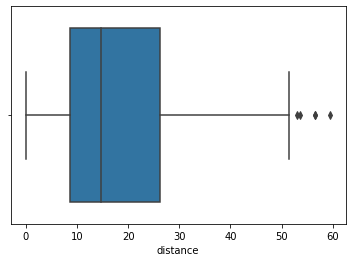

In [142]:
sns.boxplot(df['distance'])

In [143]:
pd.qcut(df['distance'],3)

0        (-0.001, 10.201]
1        (10.201, 23.056]
2        (10.201, 23.056]
3        (-0.001, 10.201]
4        (10.201, 23.056]
               ...       
43425    (10.201, 23.056]
43426    (10.201, 23.056]
43427    (10.201, 23.056]
43429    (-0.001, 10.201]
43430    (23.056, 59.539]
Name: distance, Length: 34292, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 10.201] < (10.201, 23.056] < (23.056, 59.539]]

In [144]:
df['Trip_distance']=pd.qcut(df['distance'],3,labels = ['Low','Medium','High'])

In [145]:
df.drop(columns='distance',inplace=True)

In [146]:
df

,online_booking,mobile_site_booking,Car_Cancellation,BLFA,BLTA,CLFA,CLTA,weekday,trip_start_timeperiod,Advance_booking_time,bc_timeperiod,Trip_distance
0,0,0,0,High,Medium,High,Low,1,N,Low,N,Low
1,0,0,0,High,Low,High,Low,1,M,Medium,N,Medium
2,0,0,0,Low,Low,Medium,Low,1,N,Low,N,Medium
3,0,0,0,Medium,Low,Low,Low,1,N,Low,N,Low
4,0,0,0,Medium,Low,High,Medium,1,M,Low,M,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
43425,0,1,0,High,Low,Medium,Low,1,N,Medium,A,Medium
43426,1,0,0,Medium,Medium,Low,Medium,0,A,Low,A,Medium
43427,1,0,0,High,Low,High,Low,1,N,High,A,Medium
43429,0,0,0,Low,Low,Low,Low,0,A,Low,A,Low


### Encoding

In [147]:
from sklearn import preprocessing
encoded_df = df.copy()
le = preprocessing.LabelEncoder()

le_1=le.fit(encoded_df['BLFA'])
le_1.classes_ = np.array(['Low', 'Medium','High'])   ## to assign 0 to Low and 2 to High
encoded_df['BLFA'] = le_1.transform(encoded_df['BLFA'])

le_2=le.fit(encoded_df['BLTA'])
le_2.classes_ = np.array(['Low', 'Medium','High'])
encoded_df['BLTA'] = le_2.transform(encoded_df['BLTA'])

le_3=le.fit(encoded_df['CLFA'])
le_3.classes_ = np.array(['Low', 'Medium','High'])
encoded_df['CLFA'] = le_3.transform(encoded_df['CLFA'])

le_4=le.fit(encoded_df['CLTA'])
le_4.classes_ = np.array(['Low', 'Medium','High'])
encoded_df['CLTA'] = le_4.transform(encoded_df['CLTA'])

le_5=le.fit(encoded_df['Trip_distance'])
le_5.classes_ = np.array(['Low', 'Medium','High'])
encoded_df['Trip_distance'] = le_5.transform(encoded_df['Trip_distance'])

le_6=le.fit(encoded_df['Advance_booking_time'])
le_6.classes_ = np.array(['Low', 'Medium','High'])
encoded_df['Advance_booking_time'] = le_6.transform(encoded_df['Advance_booking_time'])


encoded_df=pd.concat([encoded_df,pd.get_dummies(encoded_df['trip_start_timeperiod'],prefix='ts',drop_first=True)], axis=1)
encoded_df=pd.concat([encoded_df,pd.get_dummies(encoded_df['bc_timeperiod'],prefix='bc',drop_first=True)], axis=1)
encoded_df.drop(columns=['trip_start_timeperiod','bc_timeperiod'],axis=1,inplace=True)

In [148]:
encoded_df

,online_booking,mobile_site_booking,Car_Cancellation,BLFA,BLTA,CLFA,CLTA,weekday,Advance_booking_time,Trip_distance,ts_E,ts_M,ts_N,bc_E,bc_M,bc_N
0,0,0,0,2,1,2,0,1,0,0,0,0,1,0,0,1
1,0,0,0,2,0,2,0,1,1,1,0,1,0,0,0,1
2,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1
3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
4,0,0,0,1,0,2,1,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,0,1,0,2,0,1,0,1,1,1,0,0,1,0,0,0
43426,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0
43427,1,0,0,2,0,2,0,1,2,1,0,0,1,0,0,0
43429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Train test split

In [149]:
X=encoded_df.drop(columns='Car_Cancellation',axis=1)
y=encoded_df['Car_Cancellation']

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state = 42)

## Model Building

### Creating evaluation metrics

In [152]:
def plot_confusion_matrix(model,X_test,y_test,normalize=False):
    """
        Computes and plots the confusion matrix.         
        
        
        Parameters
        ----------
        
        model : ML model
            A trained model for which ROC is to be computed
        X_test: pandas.DataFrame
            Testing data for independent variables(features)
        y_test: pandas.Series
            Testing data for target variables
        normalize : boolean, default=False
            To normalize the matrix
        
    """
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    classes=["Not Cancelled", "Cancelled"]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [153]:
def plot_roc(model,X_test,y_test,plot_threshold=False,t=0.5):
    """
        Computes and plots the ROC curve and AUC. It also plots a given threshold value        
        
        
        Parameters
        ----------
        
        model : ML model
            A trained model for which ROC is to be computed
        X_test: pandas.DataFrame
            Testing data for independent variables(features)
        y_test: pandas.Series
            Testing data for target variables
        plot_threshold : boolean, default=False
            Whether to plot the given threshold or not.
        t : float, default=0.5
            Threshold value to plot on the graph
    """
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresh = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    

    # margins for text threshold
    y_text_margin=0.05
    x_text_margin=0.2
    
    
    x_thresh, y_thresh = fpr[np.argmin(abs(thresh - t))], tpr[np.argmin(abs(thresh - t))]
    
    ## np.argmin(abs(thresh - t)) will give you the index of the min element in the array (thresh-t)
    ## since 'thresh' array wont have the exact threshold 't' in it, so we need the
    ## one which is the closest (if t is in thresh then (thresh - t) would be zero and the min in abs(thresh - t) )

    # Roc curve
    plt.plot(fpr, tpr,lw=2,label='ROC curve (AUC = %0.2f)' % auc,linestyle='-')
    
    # Reference line
    plt.plot([0, 1], [0, 1],label="Random guess",color='red',lw=2, linestyle='--')
    
    # Plotting threshold
    if plot_threshold:
    
        plt.axhline(y=y_thresh,lw=2,color='black',linestyle=':')
        plt.axvline(x=x_thresh,lw=2,color='black',linestyle=':')
        
        # text for threshold
        if x_thresh > 0.5 and y_thresh > 0.5:
            plt.text(x=x_thresh - x_text_margin, y=y_thresh - y_text_margin,s='Threshold : {:.2f}'.format(t))
        elif x_thresh <= 0.5 and y_thresh <= 0.5:
            plt.text(x=x_thresh + x_text_margin, y=y_thresh + y_text_margin,s='Threshold : {:.2f}'.format(t))
        elif x_thresh <= 0.5 < y_thresh:
            plt.text(x=x_thresh + x_text_margin, y=y_thresh - y_text_margin,s='Threshold : {:.2f}'.format(t))
        elif x_thresh > 0.5 >= y_thresh:
            plt.text(x=x_thresh - x_text_margin, y=y_thresh + y_text_margin,s='Threshold : {:.2f}'.format(t))
        
        plt.plot(x_thresh, y_thresh, 'ro')  # redpoint of threshold on the ROC curve
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=0)

In [191]:
def plot_prc(model,X_test,y_test):
    """
        Computes and plots the precision-recall curve and AUC.        
        
        
        Parameters
        ----------
        
        model : ML model
            A trained model for which ROC is to be computed
        X_test: pandas.DataFrame
            Testing data for independent variables(features)
        y_test: pandas.Series
            Testing data for target variables
        
    """
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    prec, rec, thresh = precision_recall_curve(y_test,  y_pred_proba)
    auc_val = average_precision_score(y_test, y_pred_proba)

    
    rand = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [rand, rand],color='red', linestyle='--', label='Random')
    plt.plot(rec, prec, marker='.', label='PR curve (AUC = %0.2f)' % auc_val,linestyle='-',color='orange')
    

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=0)
    

### Logistic Regression

In [182]:
model_lr = LogisticRegression(random_state=0)

model_lr.fit(X_train, y_train)    

y_pred = model_lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Cross validation score: ',cross_val_score(model_lr, X_train, y_train, cv=10).mean())
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.9195178849144634
Cross validation score:  0.9185968693599887

			Classification report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      9458
           1       0.51      0.04      0.08       830

    accuracy                           0.92     10288
   macro avg       0.72      0.52      0.52     10288
weighted avg       0.89      0.92      0.89     10288



In [ ]:
## The accuracy is good , but due to the imbalanced dataset, we are getting poor metrics, so let us assign some class weight

In [289]:
model_lr = LogisticRegression(random_state=0,class_weight={0:1.01,1:1.2})

model_lr.fit(X_train, y_train)    

y_pred = model_lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Cross validation score: ',cross_val_score(model_lr, X_train, y_train, cv=10).mean())
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.9203926905132193
Cross validation score:  0.9177636401499374

			Classification report
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      9458
           1       0.55      0.08      0.14       830

    accuracy                           0.92     10288
   macro avg       0.74      0.54      0.55     10288
weighted avg       0.89      0.92      0.89     10288



In [290]:
## here by assigning different class weights we are getting better precision and recall also has improved a bit (compared to
## the default parameter case), but still is very low

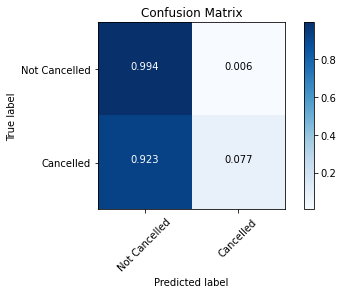

In [291]:
plot_confusion_matrix(model_lr,X_test,y_test,normalize=True)

In [ ]:
## A small business (which is not getting enough bookings) would like better precision rather than recall, since the poor
## precision means that out of all the positive predicted cases (canceled bookings) the actual(true) positives are very low
## (i.e., FPs are high) and they might not be able to afford to reject a booking which our model is predicting would be
## canceled, but the chance of that being true is very low

## But to obtain that we have very low recall here(i.e., FNs are high). We can see that only 7.7% of the total cancellable
## rides are being predicted. This implies that our model isn't helping the business much

## So let us improve our recall to catch at least considerable cancellations for it to be helpful to the business

In [198]:
model_lr = LogisticRegression(random_state=0,class_weight='balanced')

model_lr.fit(X_train, y_train)    

y_pred = model_lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Cross validation score: ',cross_val_score(model_lr, X_train, y_train, cv=10).mean())
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.729587869362364
Cross validation score:  0.723253384006664

			Classification report
               precision    recall  f1-score   support

           0       0.97      0.73      0.83      9458
           1       0.19      0.70      0.30       830

    accuracy                           0.73     10288
   macro avg       0.58      0.72      0.56     10288
weighted avg       0.90      0.73      0.79     10288



In [ ]:
## here accuracy has reduced, but the recall has improved a lot. 

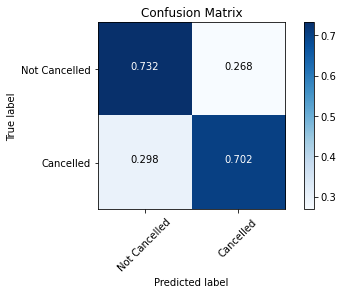

In [293]:
plot_confusion_matrix(model_lr,X_test,y_test,normalize=True)

In [ ]:
## Now we are at least predicting a considerable amount of (70.2%) of the actual cancellations at the expense of a reduction in
## the precision, which means that we are rejecting bookings that would have gone through(which wouldn't matter if the business
## is getting a good amount of bookings)

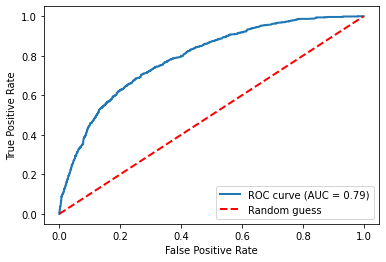

In [199]:
plot_roc(model_lr,X_test,y_test)

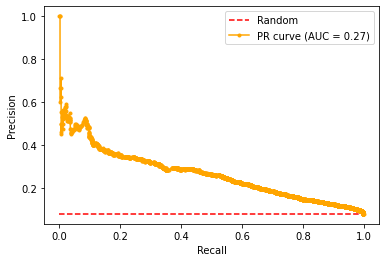

In [200]:
plot_prc(model_lr,X_test,y_test)

### SVM

In [300]:
svm = SVC(random_state=0,kernel='linear') 
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print('Cross validation score: ',cross_val_score(svm, X_train, y_train, cv=10).mean())
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.9193234836702955

			Classification report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      9458
           1       0.00      0.00      0.00       830

    accuracy                           0.92     10288
   macro avg       0.46      0.50      0.48     10288
weighted avg       0.85      0.92      0.88     10288



C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prate\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

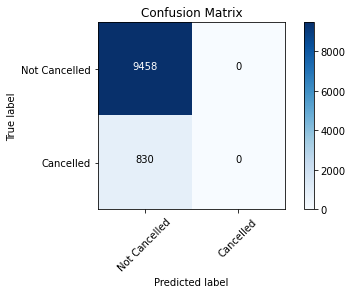

In [302]:
plot_confusion_matrix(svm,X_test,y_test)

In [ ]:
## so linear SVC is not doing a good job, as the model is just predicting all observations to be of 'Not Cancelled' class

In [298]:
svm = SVC(random_state=0,kernel='rbf',C=2,gamma=0.8) 
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Cross validation score: ',cross_val_score(svm, X_train, y_train, cv=10).mean())
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.9153382581648523
Cross validation score:  0.9154305497709287

			Classification report
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      9458
           1       0.43      0.16      0.23       830

    accuracy                           0.92     10288
   macro avg       0.68      0.57      0.59     10288
weighted avg       0.89      0.92      0.90     10288



In [ ]:
## due to the imbalance let us put some class weight

In [158]:
svm = SVC(random_state=0,kernel='rbf',C=.2,gamma=0.5,class_weight='balanced',probability=True)  
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Cross validation score: ',cross_val_score(svm, X_train, y_train, cv=10).mean())
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.7786741835147745
Cross validation score:  0.7779109225322781

			Classification report
               precision    recall  f1-score   support

           0       0.97      0.79      0.87      9458
           1       0.22      0.70      0.34       830

    accuracy                           0.78     10288
   macro avg       0.59      0.74      0.60     10288
weighted avg       0.91      0.78      0.82     10288



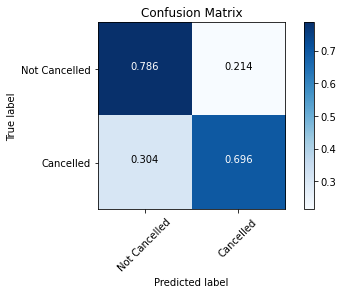

In [371]:
plot_confusion_matrix(svm,X_test,y_test,normalize=True)

In [ ]:
## so we are getting better precision at same recall compared to Logistic Regression. Here 21.4% of not cancelled bookings 
## will be labelled as cancelled by the model and 69.6% of the cancelled bookings will be predicted by the model.

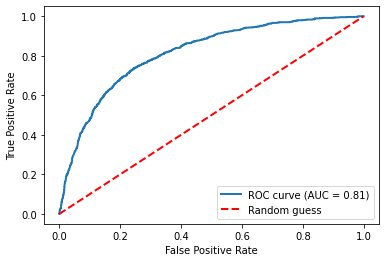

In [159]:
plot_roc(svm,X_test,y_test)

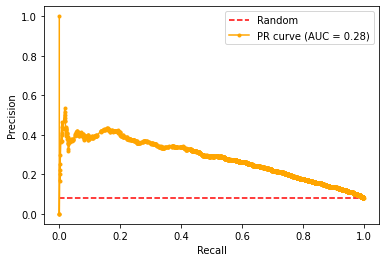

In [192]:
plot_prc(svm,X_test,y_test)

### Decision Tree

In [311]:
model_dt = DecisionTreeClassifier(random_state=101, criterion = "gini", max_depth=40,min_samples_split= 35,min_samples_leaf=15) 
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Cross validation score: ',cross_val_score(svm, X_train, y_train, cv=10).mean())
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.9197122861586314
Cross validation score:  0.909098309732056

			Classification report
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      9458
           1       0.51      0.15      0.23       830

    accuracy                           0.92     10288
   macro avg       0.72      0.57      0.59     10288
weighted avg       0.90      0.92      0.90     10288



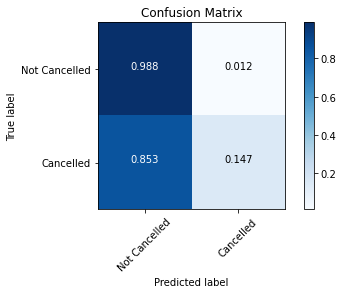

In [249]:
plot_confusion_matrix(model_dt,X_test,y_test,normalize=True)

In [ ]:
## let us try to increase our recall

In [319]:
dt_model= DecisionTreeClassifier(random_state=101)
param_dist = {'max_depth': [11,12,20,25,30,40],             
              'criterion': ['gini'],
             'min_samples_split': [2,3,4,5,8,15],
             'min_samples_leaf':[1,2,3,5,6,7,8]}


model_dtcv = GridSearchCV(dt_model, param_dist,cv=10,scoring='recall')
model_dtcv.fit(X_train, y_train)

print("Best parameters: ",model_dtcv.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [187]:
model_dt = DecisionTreeClassifier(random_state=101, criterion = "gini", max_depth=20,min_samples_split= 4,min_samples_leaf=1) 
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Cross validation score: ',cross_val_score(model_dt, X_train, y_train, cv=10).mean())
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.911450233281493
Cross validation score:  0.9076818166041927

			Classification report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9458
           1       0.40      0.19      0.26       830

    accuracy                           0.91     10288
   macro avg       0.67      0.58      0.61     10288
weighted avg       0.89      0.91      0.90     10288



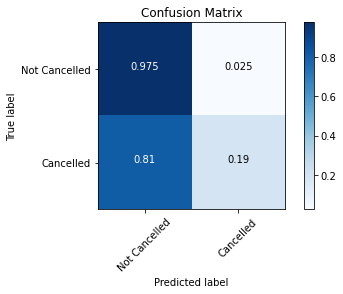

In [320]:
plot_confusion_matrix(model_dt,X_test,y_test,normalize=True)

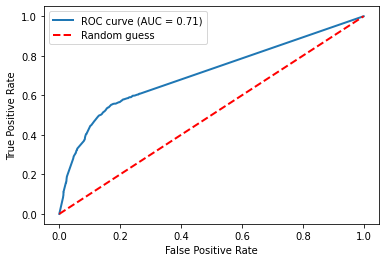

In [188]:
plot_roc(model_dt,X_test,y_test)

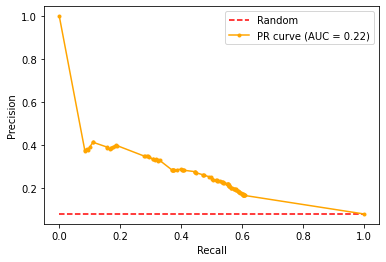

In [193]:
plot_prc(model_dt,X_test,y_test)

### Random Forest

In [333]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.set_params(n_estimators=1500)
model_rf.fit(X_train,y_train)



y_pred = model_rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Cross validation score: ',cross_val_score(svm, X_train, y_train, cv=10).mean())
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.9133942457231726
Cross validation score:  0.909098309732056

			Classification report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      9458
           1       0.42      0.20      0.27       830

    accuracy                           0.91     10288
   macro avg       0.68      0.59      0.61     10288
weighted avg       0.89      0.91      0.90     10288



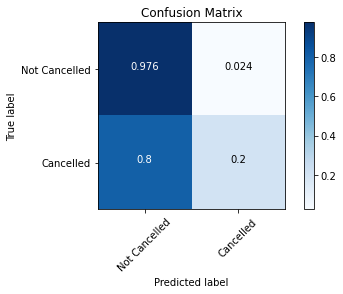

In [334]:
plot_confusion_matrix(model_rf,X_test,y_test,normalize=True)

In [ ]:
## tuning the other parameters

In [204]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.set_params(n_estimators=1500,max_depth=30,min_samples_split= 3,min_samples_leaf=1)
model_rf.fit(X_train,y_train)



y_pred = model_rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Cross validation score: ',cross_val_score(model_rf, X_train, y_train, cv=10).mean())
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.9144634525660964
Cross validation score:  0.9126395251978343

			Classification report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      9458
           1       0.43      0.20      0.27       830

    accuracy                           0.91     10288
   macro avg       0.68      0.59      0.61     10288
weighted avg       0.89      0.91      0.90     10288



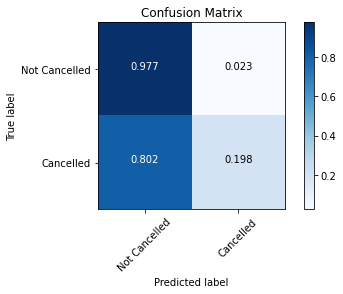

In [332]:
plot_confusion_matrix(model_rf,X_test,y_test,normalize=True)

In [ ]:
## Here even though only 2.3% of the not cancelled bookings are being mislabelled as cancelled, but out of the cancelled bookings
## the model is predicting only 19.8% of them 

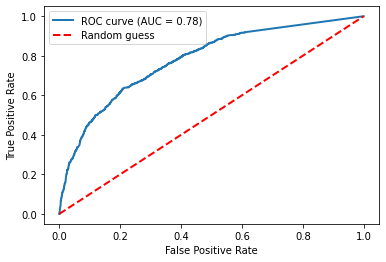

In [163]:
plot_roc(model_rf,X_test,y_test)

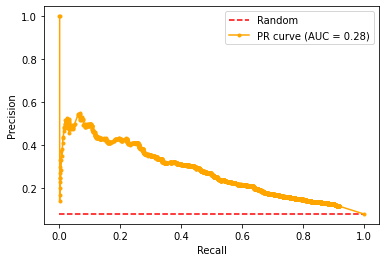

In [194]:
plot_prc(model_rf,X_test,y_test)

### KNN

In [255]:
error = []
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

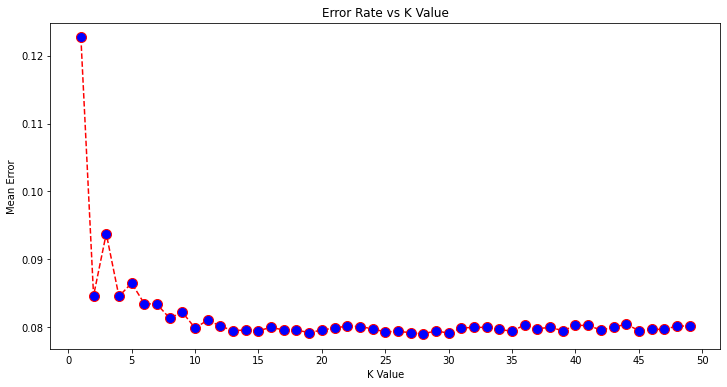

In [256]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value') 
x_ticks = np.arange(0, 51, 5)
plt.xticks(x_ticks)
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

In [ ]:
## The error plot suggests around K=5 to be an optimal value for K

In [165]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Cross validation score: ',cross_val_score(knn, X_train, y_train, cv=10).mean())
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.9134914463452566
Cross validation score:  0.9130557927252534

			Classification report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      9458
           1       0.41      0.17      0.25       830

    accuracy                           0.91     10288
   macro avg       0.67      0.58      0.60     10288
weighted avg       0.89      0.91      0.90     10288



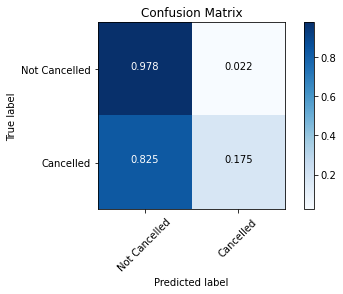

In [389]:
plot_confusion_matrix(knn,X_test,y_test,normalize=True)

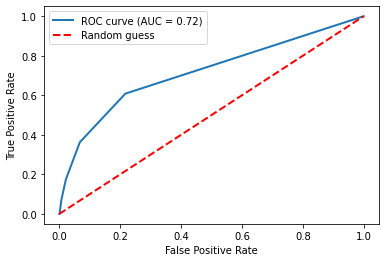

In [166]:
plot_roc(knn,X_test,y_test)

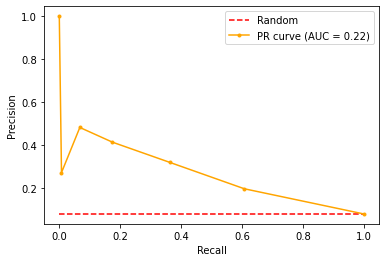

In [195]:
plot_prc(knn,X_test,y_test)

### Naive Bayes

In [203]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred=model_nb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Cross validation score: ',cross_val_score(model_nb, X_train, y_train, cv=10).mean())
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

Accuracy: 0.880151632970451
Cross validation score:  0.8819779952797445

			Classification report
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      9458
           1       0.21      0.18      0.19       830

    accuracy                           0.88     10288
   macro avg       0.57      0.56      0.56     10288
weighted avg       0.87      0.88      0.88     10288



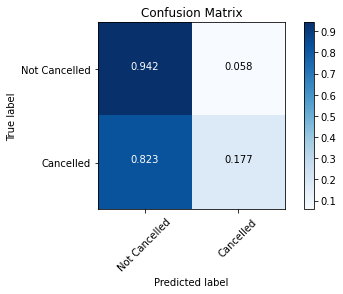

In [394]:
plot_confusion_matrix(model_nb,X_test,y_test,normalize=True)

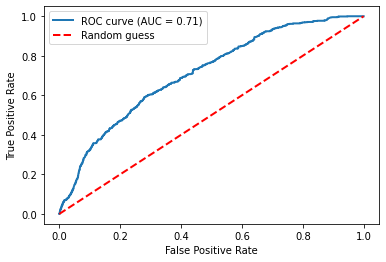

In [168]:
plot_roc(model_nb,X_test,y_test)

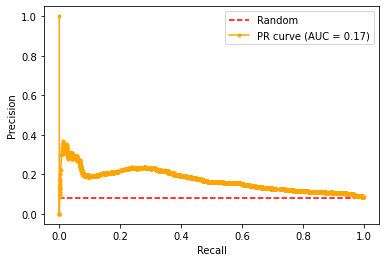

In [196]:
plot_prc(model_nb,X_test,y_test)

## Conclusion

SVM and random forest are the best performing classifiers amongst others for this dataset. Looking at their metrics we can see
that the area under the PR curve is the same in both cases and AUC for the ROC curve is better for SVM. Also, the recall is higher for the SVM model than the RF model, making it the optimal choice for the business if they can afford to lose some bookings that might have gone through (lower precision).